In [1]:
import mne
from scipy.io import loadmat
import numpy as np

In [2]:
def file_to_data(fileName):
    chnames = ['Fp1','Fp2','Fc5','Fz','Fc6','T7','Cz','T8','P7','P3','Pz','P4','P8','O1','Oz','O2','stim']
    chtypes = ['eeg'] * 16 + ['stim']
    info = mne.create_info(ch_names=chnames, sfreq=512,ch_types=chtypes, montage='standard_1020',verbose=False)
    data = loadmat(fileName)["SIGNAL"]
    #On modifie pour avoir un dataset avec 1 : yeux ouvert et -1 yeux fermée
    new_data=[]
    yeux_ouvert=False
    for k in range(len(data)):
        if(yeux_ouvert==False):
            tmp=np.append(data[k][1:17],-1)
        else:
            tmp=np.append(data[k][1:17],1)
        new_data.append(tmp)
        if(data[k][17]==1):
            yeux_ouvert=True
        if(data[k][18]==1):
            yeux_ouvert=False
    labels= [d[16] for d in new_data]
    donnees = [d[:16] for d in new_data]
    return donnees,labels

In [3]:
donnees,labels = file_to_data("data/subject_01.mat")

In [4]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [16]:
#validation croisée Perceptron
#tol =1e-1 condition d'arret
tab_f1_score=[]
tab_k=[]
for k in range(1,101,10):
    print(k)
    tab_k.append(k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(neigh,donnees,labels,cv=5)
    rapport = classification_report(labels, y_pred,output_dict=True)
    print("F1 Score : "+str(rapport['micro avg']["f1-score"]))
    tab_f1_score.append(rapport['micro avg']["f1-score"])
print(rapport)

1
F1 Score : 0.6116202590811965
11
F1 Score : 0.6103348691239316
21
F1 Score : 0.6103932959401709
31
F1 Score : 0.6101512419871795
41
F1 Score : 0.6101679353632479
51
F1 Score : 0.6099425747863247
61
F1 Score : 0.6100093482905983
71
F1 Score : 0.6101345486111112
81
F1 Score : 0.6104433760683761
91
F1 Score : 0.6104517227564102
{'-1.0': {'precision': 0.697597380344972, 'recall': 0.7063926588525602, 'f1-score': 0.7019674706412, 'support': 77808}, '1.0': {'precision': 0.44306297081840124, 'recall': 0.4327142857142857, 'f1-score': 0.4378274852744553, 'support': 42000}, 'micro avg': {'precision': 0.6104517227564102, 'recall': 0.6104517227564102, 'f1-score': 0.6104517227564102, 'support': 119808}, 'macro avg': {'precision': 0.5703301755816866, 'recall': 0.569553472283423, 'f1-score': 0.5698974779578276, 'support': 119808}, 'weighted avg': {'precision': 0.6083675693130212, 'recall': 0.6104517227564102, 'f1-score': 0.6093703203223292, 'support': 119808}}


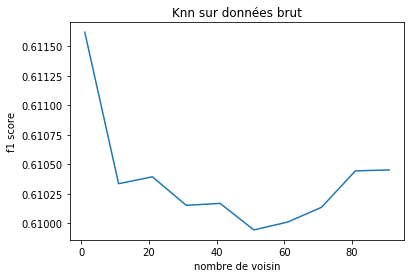

In [18]:
plt.plot(tab_k,tab_f1_score,label="f1 score")
plt.title("Knn sur données brut")
plt.xlabel("nombre de voisin")
plt.ylabel("f1 score")
plt.savefig("images/f1_score_knn_données_brut_k_entre_1_et_91.png",bbox_inches='tight')
plt.show()